### Imports

In [1]:
import numpy as np

# Add models here
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# Sklearn imports for processing and evaluation
from sklearn.decomposition import PCA
from sklearn.metrics import median_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Plotting
from matplotlib import pyplot as plt

# Misc
import time
from tqdm import tqdm

### Load Data

In [2]:
x_train = np.loadtxt("./uci_har_dataset/train/X_train.txt")
y_train = np.loadtxt("./uci_har_dataset/train/y_train.txt")

x_test = np.loadtxt("./uci_har_dataset/test/X_test.txt")
y_test = np.loadtxt("./uci_har_dataset/test/y_test.txt")

### Combine Data

In [3]:
combined_x = np.concatenate((x_train, x_test))
combined_y = np.concatenate((y_train, y_test))

assert combined_x.shape[0] == x_train.shape[0] + x_test.shape[0]
assert combined_y.shape[0] == y_train.shape[0] + y_test.shape[0]

### Baseline model
#### Neural Network

In [4]:
def do_kfoldNN(x_data, y_data, features='all', folds=10):
    start = time.time()
    # Do KFold
    kf = KFold(folds)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(x_data))):    
        
        # Do PCA
        features = x_data.shape[1] if(features == 'all') else features
        pca = PCA(n_components=features)
        scalar = StandardScaler().fit(x_data[train_idx])
        standardized = scalar.transform(x_data[train_idx])
        transformed = pca.fit_transform(standardized)
        
        # Fit and time model
        
        x = x_data[train_idx].astype('float32')
        n_features = x_data[train_idx].shape[1]
        k1 = transformed.shape[1]
        print(k1)
        model = Sequential()
        model.add(Dense(k1, activation='relu', kernel_initializer='he_normal', input_shape=(k1,)))
        model.add(Dense(384, activation='relu',  kernel_initializer='he_normal'))
        model.add(Dense(6,activation='softmax'))
        
        optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')
        
        model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(transformed, y_data[train_idx], batch_size = 30, epochs = 5)
        # Transform test data and evaluate
        test_transform = np.dot(scalar.transform(x_data[test_idx]), pca.components_.T)
        preds = model.predict(test_transform)
        #print(preds)
        #print(y_data[test_idx])
        loss, score = model.evaluate(test_transform, y_data[test_idx], verbose=0)
        #score = accuracy_score(preds, y_data[test_idx])
        pred_accuracy.append(score)
        fit_times.append(time.time() - start)
        
    print(r"{0} FEATURES PREDICTION ACCURACY: {1:.3f} $\pm$ {2:.3f}".format(features, np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

In [5]:
for i in range (0,len(combined_y)):
    combined_y[i] = combined_y[i]-1

pred_accuracyNN, fit_timesNN = do_kfoldNN(combined_x, combined_y, features=561)

scores_nn = np.mean(pred_accuracyNN)
scores_nn_std = np.std(pred_accuracyNN)
time_nn = np.mean(fit_timesNN)

print(f"The accuracy is {np.mean(scores_nn)*100:1.3f}% with a standard deviation of {scores_nn_std:1.3f}")
print(f"The time taken to complete the model is {time_nn:1.2f}s")

0it [00:00, ?it/s]

561
Epoch 1/5
309/309 [==============================] - 1s 3ms/step - loss: 0.1581 - accuracy: 0.9414
Epoch 2/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0371 - accuracy: 0.9871
Epoch 3/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0191 - accuracy: 0.9927
Epoch 4/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0046 - accuracy: 0.9992
Epoch 5/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0011 - accuracy: 1.0000


1it [00:07,  7.07s/it]

561
Epoch 1/5
309/309 [==============================] - 1s 3ms/step - loss: 0.1568 - accuracy: 0.9443
Epoch 2/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0419 - accuracy: 0.9873
Epoch 3/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0116 - accuracy: 0.9955
Epoch 4/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0092 - accuracy: 0.9965
Epoch 5/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0060 - accuracy: 0.9977


2it [00:13,  6.74s/it]

561
Epoch 1/5
309/309 [==============================] - 1s 3ms/step - loss: 0.1473 - accuracy: 0.9439
Epoch 2/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0463 - accuracy: 0.9847
Epoch 3/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0258 - accuracy: 0.9910
Epoch 4/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0099 - accuracy: 0.9970
Epoch 5/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0083 - accuracy: 0.9986


3it [00:19,  6.58s/it]

561
Epoch 1/5
309/309 [==============================] - 1s 3ms/step - loss: 0.1593 - accuracy: 0.9410
Epoch 2/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0274 - accuracy: 0.9893
Epoch 3/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0158 - accuracy: 0.9946
Epoch 4/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0266 - accuracy: 0.9913
Epoch 5/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0103 - accuracy: 0.9981


4it [00:25,  6.42s/it]

561
Epoch 1/5
309/309 [==============================] - 1s 3ms/step - loss: 0.1718 - accuracy: 0.9380
Epoch 2/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0332 - accuracy: 0.9890
Epoch 3/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0172 - accuracy: 0.9940
Epoch 4/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0150 - accuracy: 0.9958
Epoch 5/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0093 - accuracy: 0.9968


5it [00:31,  6.34s/it]

561
Epoch 1/5
309/309 [==============================] - 1s 3ms/step - loss: 0.1595 - accuracy: 0.9413
Epoch 2/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0524 - accuracy: 0.9838
Epoch 3/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0194 - accuracy: 0.9931
Epoch 4/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0075 - accuracy: 0.9978
Epoch 5/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0055 - accuracy: 0.9983


6it [00:37,  6.30s/it]

561
Epoch 1/5
309/309 [==============================] - 1s 3ms/step - loss: 0.1638 - accuracy: 0.9410
Epoch 2/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0388 - accuracy: 0.9867
Epoch 3/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0298 - accuracy: 0.9904
Epoch 4/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0107 - accuracy: 0.9967
Epoch 5/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0042 - accuracy: 0.9988


7it [00:44,  6.32s/it]

561
Epoch 1/5
309/309 [==============================] - 1s 3ms/step - loss: 0.1680 - accuracy: 0.9408
Epoch 2/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9872
Epoch 3/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0144 - accuracy: 0.9948
Epoch 4/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0146 - accuracy: 0.9944
Epoch 5/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0048 - accuracy: 0.9985


8it [00:50,  6.30s/it]

561
Epoch 1/5
309/309 [==============================] - 1s 3ms/step - loss: 0.1604 - accuracy: 0.9433
Epoch 2/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0350 - accuracy: 0.9876
Epoch 3/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0126 - accuracy: 0.9959
Epoch 4/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 5/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0078 - accuracy: 0.9977


9it [00:56,  6.23s/it]

561
Epoch 1/5
309/309 [==============================] - 1s 3ms/step - loss: 0.1593 - accuracy: 0.9431
Epoch 2/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0359 - accuracy: 0.9873
Epoch 3/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0191 - accuracy: 0.9927
Epoch 4/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0087 - accuracy: 0.9969
Epoch 5/5
309/309 [==============================] - 1s 3ms/step - loss: 0.0105 - accuracy: 0.9963


10it [01:02,  6.24s/it]

561 FEATURES PREDICTION ACCURACY: 0.955 $\pm$ 0.031
The accuracy is 95.456% with a standard deviation of 0.031
The time taken to complete the model is 34.69s


#### Logistic Regression

In [6]:
# prepare the cross-validation procedure
t0 = time.time()
cv = KFold(n_splits=5)
# create model
model = LogisticRegression(multi_class='ovr', solver='liblinear')
# evaluate model
scores = cross_val_score(model, combined_x, combined_y, scoring='accuracy', cv=cv)
scores_lr = np.mean(scores)
scores_lr_std = np.std(scores)
print(f"The accuracy is {np.mean(scores_lr)*100:1.3f}% with a standard deviation of {np.std(scores_lr):1.3f}")
t1 = time.time()
t1 = time.time()
time_lg = t1 - t0
print(f"The time taken to complete the model is {time_lg:1.2f}s")

The accuracy is 96.165% with a standard deviation of 0.000
The time taken to complete the model is 25.14s


#### SVM Linear

In [7]:
tsvm_0 = time.time()
cv = KFold(n_splits=5)
# create model
model = svm.SVC(kernel='linear', C=1)
# evaluate model
scores = cross_val_score(model, combined_x, combined_y, scoring='accuracy', cv=cv)
scores_svm_linear = np.mean(scores)
scores_svm_linear_std = np.std(scores)

print(f"The accuracy is {np.mean(scores_svm_linear)*100:1.3f}% with a standard deviation of {scores_svm_linear_std:1.3f}")
tsvm_1 = time.time()
time_svm_linear = tsvm_1 - tsvm_0
print(f"The time taken to complete the model is {time_svm_linear:1.2f}s")

The accuracy is 96.087% with a standard deviation of 0.015
The time taken to complete the model is 16.13s


#### SVM Poly

In [8]:
tsvm_poly_0 = time.time()
cv = KFold(n_splits=10)
# create model
model = svm.SVC(kernel='poly', C=1)
# evaluate model
scores= cross_val_score(model, combined_x, combined_y, scoring='accuracy', cv=cv)
scores_svm_poly = np.mean(scores)
scores_svm_poly_std = np.std(scores)

print(f"The accuracy is {scores_svm_poly*100:1.3f}% with a standard deviation of {scores_svm_poly_std:1.3f}")
tsvm_poly_1 = time.time()
time_svm_poly = tsvm_poly_1 - tsvm_poly_0
print(f"The time taken to complete the model is {time_svm_poly:1.2f}s")

The accuracy is 95.941% with a standard deviation of 0.022
The time taken to complete the model is 47.34s


#### Random Forest

In [9]:
trf_0 = time.time()
cv = KFold(n_splits=5)
# create model
model = RandomForestClassifier()
# evaluate model
scores_rf = cross_val_score(model, combined_x, combined_y, scoring='accuracy', cv=cv)
scores_rf = np.mean(scores)
scores_rf_std = np.std(scores)

print(f"The accuracy is {scores_rf*100:1.3f}% with a standard deviation of {scores_rf_std:1.3f}")
trf_1 = time.time()
time_rf = trf_1 - trf_0
print(f"The time taken to complete the model is {time_rf:1.2f}s")

The accuracy is 95.941% with a standard deviation of 0.022
The time taken to complete the model is 45.61s


#### Gradient Boost

In [10]:
tgb_0 = time.time()
cv = KFold(n_splits=5)
# create model
model = GradientBoostingClassifier()
# evaluate model
scores = cross_val_score(model, combined_x, combined_y, scoring='accuracy', cv=cv)
scores_gb = np.mean(scores)
scores_gb_std = np.std(scores)

print(f"The accuracy is {scores_gb*100:1.3f}% with a standard deviation of {scores_gb_std:1.3f}")
tgb_1 = time.time()

tgb_1 = time.time()
time_gb = tgb_1 - tgb_0
print(f"The time taken to complete the model is {time_gb:1.2f}s")

The accuracy is 94.233% with a standard deviation of 0.014
The time taken to complete the model is 3003.03s


#### Plots comparing accuracy and time to run the alogrithms

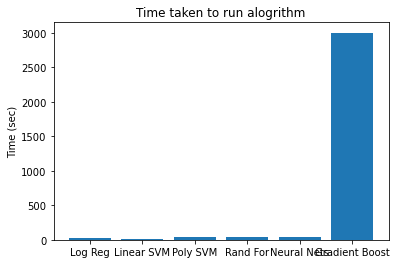

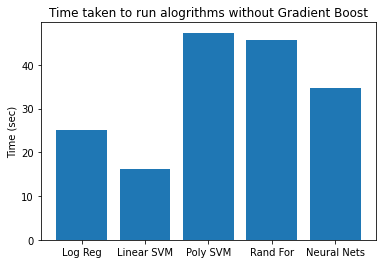

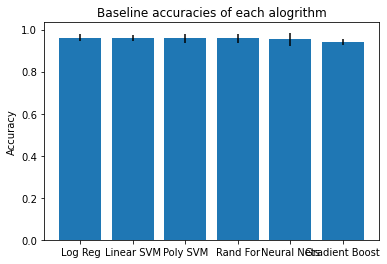

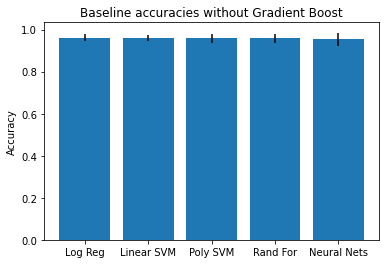

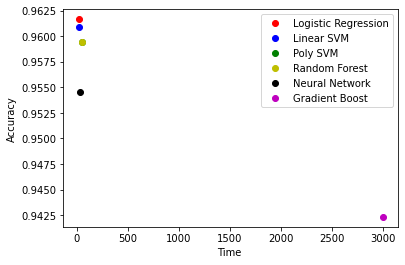

In [86]:
run_time = np.array([time_lg, time_svm_linear, time_svm_poly, time_rf, time_nn, time_gb])
accuracies =  np.array([scores_lr, scores_svm_linear, scores_svm_poly, scores_rf, scores_nn, scores_gb])
accuracy_std = np.array([scores_lr_std, scores_svm_linear_std, scores_svm_poly_std, scores_rf_std, scores_nn_std, scores_gb_std])
name_models = ['Log Reg', 'Linear SVM', 'Poly SVM','Rand For', 'Neural Nets', 'Gradient Boost']

name_model_wgb = ['Log Reg', 'Linear SVM', 'Poly SVM','Rand For', 'Neural Nets']
accuracies_wgb =  np.array([scores_lr, scores_svm_linear, scores_svm_poly, scores_rf, scores_nn])
accuracy_std_wgb = np.array([scores_lr_std, scores_svm_linear_std, scores_svm_poly_std, scores_rf_std, scores_nn_std])
run_time_wgb = np.array([time_lg, time_svm_linear, time_svm_poly, time_rf, time_nn])

plt.figure
plt.bar(name_models, run_time)
plt.title('Time taken to run alogrithm')
plt.ylabel('Time (sec)')
plt.show()

plt.figure
plt.bar(name_model_wgb, run_time_wgb)
plt.title('Time taken to run alogrithms without Gradient Boost')
plt.ylabel('Time (sec)')
plt.show()

plt.figure
plt.bar(name_models, accuracies, yerr=accuracy_std)
plt.title('Baseline accuracies of each alogrithm')
plt.ylabel('Accuracy')
plt.show()

plt.figure
plt.bar(name_model_wgb, accuracies_wgb, yerr=accuracy_std_wgb)
plt.title('Baseline accuracies without Gradient Boost')
plt.ylabel('Accuracy')
plt.show()

plt.plot(time_lg,scores_lr, 'ro', label = 'Logistic Regression')
plt.plot(time_svm_linear,scores_svm_linear, 'bo', label = 'Linear SVM')
plt.plot(time_svm_poly,scores_svm_poly, 'go', label = 'Poly SVM')
plt.plot(time_rf,scores_rf, 'yo', label = 'Random Forest')
plt.plot(time_nn,scores_nn, 'ko', label = 'Neural Network')
plt.plot(time_gb,scores_gb, 'mo', label = 'Gradient Boost')
plt.xlabel('Time ')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 2
### Comparing feature selection and feature extraction

### Feature selection using probabilistic mutual information

In [14]:
def do_kfold_mutual_info(model, x_data, y_data, features='all', folds=10):
     
    # Do KFold
    kf = KFold(folds)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(x_data))):    
        
        # Do Mutual Information Feature Extraction
        features = x_data.shape[1] if(features == 'all') else features
        fs = SelectKBest(score_func=mutual_info_classif, k=features)
        fs.fit(x_data[train_idx], y_data[train_idx])
        x_train_fs = fs.transform(x_data[train_idx])
        x_test_fs = fs.transform(x_data[test_idx])
        
        # Fit and time model
        start = time.time()
        model.fit(x_train_fs, y_data[train_idx])
        fit_times.append(time.time() - start)
        
        # Transform test data and evaluate

        preds = model.predict(x_test_fs)
        score = accuracy_score(preds, y_data[test_idx])
        pred_accuracy.append(score)
        
    print(r"{0} FEATURES PREDICTION ACCURACY: {1:.3f} $\pm$ {2:.3f}".format(features, np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

### Training for Different Number of Mutual information

In [15]:
# Number of PCA Components
num_features = np.arange(5, 500, 20)

results = []
times = []
for features in num_features:
    print(features)
    pred_accuracy, fit_times = do_kfold_mutual_info(svm.SVC(kernel='linear', C=1), combined_x, combined_y, features=features)
    results.append(pred_accuracy)
    times.append(fit_times)

# Get means
ml_acc_mean = np.mean(results, axis=1)
ml_acc_stds = np.std(results, axis=1)
ml_time_mean = np.mean(times, axis=1)
ml_time_stds = np.std(times, axis=1)

0it [00:00, ?it/s]

5


10it [05:56, 35.70s/it]
0it [00:00, ?it/s]

5 FEATURES PREDICTION ACCURACY: 0.692 $\pm$ 0.138
25


10it [06:02, 36.21s/it]
0it [00:00, ?it/s]

25 FEATURES PREDICTION ACCURACY: 0.855 $\pm$ 0.048
45


10it [05:47, 34.73s/it]
0it [00:00, ?it/s]

45 FEATURES PREDICTION ACCURACY: 0.899 $\pm$ 0.031
65


10it [05:53, 35.34s/it]
0it [00:00, ?it/s]

65 FEATURES PREDICTION ACCURACY: 0.916 $\pm$ 0.031
85


10it [05:48, 34.81s/it]
0it [00:00, ?it/s]

85 FEATURES PREDICTION ACCURACY: 0.921 $\pm$ 0.031
105


10it [05:52, 35.29s/it]
0it [00:00, ?it/s]

105 FEATURES PREDICTION ACCURACY: 0.927 $\pm$ 0.032
125


10it [05:52, 35.27s/it]
0it [00:00, ?it/s]

125 FEATURES PREDICTION ACCURACY: 0.928 $\pm$ 0.032
145


10it [06:01, 36.19s/it]
0it [00:00, ?it/s]

145 FEATURES PREDICTION ACCURACY: 0.937 $\pm$ 0.027
165


10it [05:59, 35.95s/it]
0it [00:00, ?it/s]

165 FEATURES PREDICTION ACCURACY: 0.939 $\pm$ 0.024
185


10it [06:05, 36.54s/it]
0it [00:00, ?it/s]

185 FEATURES PREDICTION ACCURACY: 0.940 $\pm$ 0.022
205


10it [06:05, 36.59s/it]
0it [00:00, ?it/s]

205 FEATURES PREDICTION ACCURACY: 0.944 $\pm$ 0.025
225


10it [05:50, 35.02s/it]
0it [00:00, ?it/s]

225 FEATURES PREDICTION ACCURACY: 0.946 $\pm$ 0.024
245


10it [06:02, 36.25s/it]
0it [00:00, ?it/s]

245 FEATURES PREDICTION ACCURACY: 0.947 $\pm$ 0.023
265


10it [05:59, 35.97s/it]
0it [00:00, ?it/s]

265 FEATURES PREDICTION ACCURACY: 0.947 $\pm$ 0.025
285


10it [06:07, 36.79s/it]
0it [00:00, ?it/s]

285 FEATURES PREDICTION ACCURACY: 0.946 $\pm$ 0.024
305


10it [06:16, 37.61s/it]
0it [00:00, ?it/s]

305 FEATURES PREDICTION ACCURACY: 0.944 $\pm$ 0.023
325


10it [06:18, 37.86s/it]
0it [00:00, ?it/s]

325 FEATURES PREDICTION ACCURACY: 0.942 $\pm$ 0.028
345


10it [06:10, 37.08s/it]
0it [00:00, ?it/s]

345 FEATURES PREDICTION ACCURACY: 0.941 $\pm$ 0.028
365


10it [06:09, 36.99s/it]
0it [00:00, ?it/s]

365 FEATURES PREDICTION ACCURACY: 0.942 $\pm$ 0.029
385


10it [06:11, 37.17s/it]
0it [00:00, ?it/s]

385 FEATURES PREDICTION ACCURACY: 0.943 $\pm$ 0.032
405


10it [06:04, 36.45s/it]
0it [00:00, ?it/s]

405 FEATURES PREDICTION ACCURACY: 0.943 $\pm$ 0.030
425


10it [06:21, 38.19s/it]
0it [00:00, ?it/s]

425 FEATURES PREDICTION ACCURACY: 0.952 $\pm$ 0.027
445


10it [06:26, 38.70s/it]
0it [00:00, ?it/s]

445 FEATURES PREDICTION ACCURACY: 0.953 $\pm$ 0.025
465


10it [06:21, 38.13s/it]
0it [00:00, ?it/s]

465 FEATURES PREDICTION ACCURACY: 0.959 $\pm$ 0.023
485


10it [06:22, 38.30s/it]

485 FEATURES PREDICTION ACCURACY: 0.958 $\pm$ 0.025


### Feature extraction using PCA

In [16]:
def do_kfold_pca(model, x_data, y_data, features='all', folds=10):
     
    # Do KFold
    kf = KFold(folds)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(x_data))):    
        
        # Do PCA
        features = x_data.shape[1] if(features == 'all') else features
        pca = PCA(n_components=features)
        scalar = StandardScaler().fit(x_data[train_idx])
        standardized = scalar.transform(x_data[train_idx])
        transformed = pca.fit_transform(standardized)
        
        # Fit and time model
        start = time.time()
        model.fit(transformed, y_data[train_idx])
        fit_times.append(time.time() - start)
        
        # Transform test data and evaluate
        test_transform = np.dot(scalar.transform(x_data[test_idx]), pca.components_.T)
        preds = model.predict(test_transform)
        score = accuracy_score(preds, y_data[test_idx])
        pred_accuracy.append(score)
        
    print(r"{0} FEATURES PREDICTION ACCURACY: {1:.3f} $\pm$ {2:.3f}".format(features, np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

In [17]:
num_features = np.arange(5, 500, 20)
results = []
times = []
for features in num_features:
    pred_accuracy, fit_times = do_kfold_pca(svm.SVC(kernel='linear', C=1), combined_x, combined_y, features=features)
    results.append(pred_accuracy)
    times.append(fit_times)

# Get means
pca_acc_mean = np.mean(results, axis=1)
pca_acc_stds = np.std(results, axis=1)
pca_time_mean = np.mean(times, axis=1)
pca_time_stds = np.std(times, axis=1)

10it [00:12,  1.25s/it]
0it [00:00, ?it/s]

5 FEATURES PREDICTION ACCURACY: 0.808 $\pm$ 0.035


10it [00:14,  1.44s/it]
0it [00:00, ?it/s]

25 FEATURES PREDICTION ACCURACY: 0.890 $\pm$ 0.034


10it [00:14,  1.48s/it]
0it [00:00, ?it/s]

45 FEATURES PREDICTION ACCURACY: 0.911 $\pm$ 0.026


10it [00:13,  1.38s/it]
0it [00:00, ?it/s]

65 FEATURES PREDICTION ACCURACY: 0.919 $\pm$ 0.027


10it [00:15,  1.58s/it]
0it [00:00, ?it/s]

85 FEATURES PREDICTION ACCURACY: 0.928 $\pm$ 0.024


10it [00:17,  1.76s/it]
0it [00:00, ?it/s]

105 FEATURES PREDICTION ACCURACY: 0.935 $\pm$ 0.023


10it [00:18,  1.88s/it]
0it [00:00, ?it/s]

125 FEATURES PREDICTION ACCURACY: 0.937 $\pm$ 0.023


10it [00:20,  2.10s/it]
0it [00:00, ?it/s]

145 FEATURES PREDICTION ACCURACY: 0.942 $\pm$ 0.022


10it [00:22,  2.26s/it]
0it [00:00, ?it/s]

165 FEATURES PREDICTION ACCURACY: 0.946 $\pm$ 0.021


10it [00:23,  2.35s/it]
0it [00:00, ?it/s]

185 FEATURES PREDICTION ACCURACY: 0.948 $\pm$ 0.022


10it [00:24,  2.48s/it]
0it [00:00, ?it/s]

205 FEATURES PREDICTION ACCURACY: 0.953 $\pm$ 0.020


10it [00:26,  2.69s/it]
0it [00:00, ?it/s]

225 FEATURES PREDICTION ACCURACY: 0.954 $\pm$ 0.019


10it [00:27,  2.78s/it]
0it [00:00, ?it/s]

245 FEATURES PREDICTION ACCURACY: 0.957 $\pm$ 0.020


10it [00:28,  2.86s/it]
0it [00:00, ?it/s]

265 FEATURES PREDICTION ACCURACY: 0.957 $\pm$ 0.020


10it [00:29,  2.97s/it]
0it [00:00, ?it/s]

285 FEATURES PREDICTION ACCURACY: 0.956 $\pm$ 0.022


10it [00:32,  3.21s/it]
0it [00:00, ?it/s]

305 FEATURES PREDICTION ACCURACY: 0.958 $\pm$ 0.021


10it [00:33,  3.39s/it]
0it [00:00, ?it/s]

325 FEATURES PREDICTION ACCURACY: 0.959 $\pm$ 0.021


10it [00:35,  3.58s/it]
0it [00:00, ?it/s]

345 FEATURES PREDICTION ACCURACY: 0.959 $\pm$ 0.022


10it [00:36,  3.66s/it]
0it [00:00, ?it/s]

365 FEATURES PREDICTION ACCURACY: 0.958 $\pm$ 0.021


10it [00:37,  3.75s/it]
0it [00:00, ?it/s]

385 FEATURES PREDICTION ACCURACY: 0.958 $\pm$ 0.021


10it [00:37,  3.78s/it]
0it [00:00, ?it/s]

405 FEATURES PREDICTION ACCURACY: 0.958 $\pm$ 0.020


10it [00:39,  3.95s/it]
0it [00:00, ?it/s]

425 FEATURES PREDICTION ACCURACY: 0.958 $\pm$ 0.020


10it [00:41,  4.15s/it]
0it [00:00, ?it/s]

445 FEATURES PREDICTION ACCURACY: 0.958 $\pm$ 0.020


10it [00:36,  3.68s/it]
0it [00:00, ?it/s]

465 FEATURES PREDICTION ACCURACY: 0.958 $\pm$ 0.020


10it [00:38,  3.83s/it]

485 FEATURES PREDICTION ACCURACY: 0.958 $\pm$ 0.020


### Psuedo Data

In [70]:
def do_kfold_psudodata(model, x_data, y_data, num_points=500, folds=10, seed=1):
         
    # Do KFold
    kf = KFold(folds)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    
    np.random.seed(seed)
    
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(list(range(len(y_data)))))): 
        
        # Get mean and std for each label
        x_1 = combined_x[train_idx][np.argwhere(combined_y[train_idx] == 0)[:,0]]
        x_2 = combined_x[train_idx][np.argwhere(combined_y[train_idx] == 1)[:,0]]
        x_3 = combined_x[train_idx][np.argwhere(combined_y[train_idx] == 2)[:,0]]
        x_4 = combined_x[train_idx][np.argwhere(combined_y[train_idx] == 3)[:,0]]
        x_5 = combined_x[train_idx][np.argwhere(combined_y[train_idx] == 4)[:,0]]
        x_6 = combined_x[train_idx][np.argwhere(combined_y[train_idx] == 5)[:,0]]

        mean_1 = np.mean(x_1, axis=0)
        std_1 = np.std(x_1, axis=0)
        mean_2 = np.mean(x_2, axis=0)
        std_2 = np.std(x_2, axis=0)
        mean_3 = np.mean(x_3, axis=0)
        std_3 = np.std(x_3, axis=0)
        mean_4 = np.mean(x_4, axis=0)
        std_4 = np.std(x_4, axis=0)
        mean_5 = np.mean(x_5, axis=0)
        std_5 = np.std(x_5, axis=0)
        mean_6 = np.mean(x_6, axis=0)
        std_6 = np.std(x_6, axis=0)
    
        # Sample Pseudodata
        sampled_x1 = np.random.multivariate_normal(mean_1, std_1*np.eye(len(std_1)), num_points)
        sampled_x2 = np.random.multivariate_normal(mean_2, std_2*np.eye(len(std_2)), num_points)
        sampled_x3 = np.random.multivariate_normal(mean_3, std_3*np.eye(len(std_3)), num_points)
        sampled_x4 = np.random.multivariate_normal(mean_4, std_4*np.eye(len(std_4)), num_points)
        sampled_x5 = np.random.multivariate_normal(mean_5, std_5*np.eye(len(std_5)), num_points)
        sampled_x6 = np.random.multivariate_normal(mean_6, std_6*np.eye(len(std_6)), num_points)

        # Combine pseudodata
        sampled_combined = np.concatenate([sampled_x1, sampled_x2, sampled_x3, sampled_x4, sampled_x5, sampled_x6])

        # Get labels
        labels = np.ones(len(sampled_combined))
        for i in range(1,7):
            labels[(i-1)*num_points:(i)*num_points] *= i

        # Fit and time model
        start = time.time()
        model.fit(sampled_combined, labels)
        fit_times.append(time.time() - start)
        
        # Score model
        preds = model.predict(x_data[test_idx])
        score = accuracy_score(preds, y_data[test_idx])
        pred_accuracy.append(score)
        
    print(r"{0} POINTS PREDICTION ACCURACY: {1:.3f} $\pm$ {2:.3f}".format(num_points, np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

In [71]:
# Number of Psuedo data points
num_points =np.arange(5, 500, 20)

results = []
times = []
for num in num_points:
    pred_accuracy, fit_times = do_kfold_psudodata(svm.SVC(kernel='linear', C=1), combined_x, combined_y, num_points=num)
    results.append(pred_accuracy)
    times.append(fit_times)
    
# Get means
psd_acc_mean = np.mean(results, axis=1)
psd_acc_stds = np.std(results, axis=1)
psd_time_mean = np.mean(times, axis=1)
psd_time_stds = np.std(times, axis=1)

10it [00:04,  2.12it/s]
0it [00:00, ?it/s]

5 POINTS PREDICTION ACCURACY: 0.095 $\pm$ 0.056


10it [00:05,  1.80it/s]
0it [00:00, ?it/s]

25 POINTS PREDICTION ACCURACY: 0.064 $\pm$ 0.026


10it [00:06,  1.57it/s]
0it [00:00, ?it/s]

45 POINTS PREDICTION ACCURACY: 0.065 $\pm$ 0.032


10it [00:07,  1.38it/s]
0it [00:00, ?it/s]

65 POINTS PREDICTION ACCURACY: 0.064 $\pm$ 0.029


10it [00:08,  1.20it/s]
0it [00:00, ?it/s]

85 POINTS PREDICTION ACCURACY: 0.060 $\pm$ 0.028


10it [00:09,  1.08it/s]
0it [00:00, ?it/s]

105 POINTS PREDICTION ACCURACY: 0.062 $\pm$ 0.025


10it [00:09,  1.03it/s]
0it [00:00, ?it/s]

125 POINTS PREDICTION ACCURACY: 0.066 $\pm$ 0.028


10it [00:10,  1.07s/it]
0it [00:00, ?it/s]

145 POINTS PREDICTION ACCURACY: 0.066 $\pm$ 0.028


10it [00:11,  1.13s/it]
0it [00:00, ?it/s]

165 POINTS PREDICTION ACCURACY: 0.061 $\pm$ 0.023


10it [00:11,  1.20s/it]
0it [00:00, ?it/s]

185 POINTS PREDICTION ACCURACY: 0.063 $\pm$ 0.020


10it [00:12,  1.25s/it]
0it [00:00, ?it/s]

205 POINTS PREDICTION ACCURACY: 0.066 $\pm$ 0.023


10it [00:13,  1.35s/it]
0it [00:00, ?it/s]

225 POINTS PREDICTION ACCURACY: 0.062 $\pm$ 0.023


10it [00:14,  1.42s/it]
0it [00:00, ?it/s]

245 POINTS PREDICTION ACCURACY: 0.062 $\pm$ 0.023


10it [00:14,  1.49s/it]
0it [00:00, ?it/s]

265 POINTS PREDICTION ACCURACY: 0.067 $\pm$ 0.027


10it [00:15,  1.56s/it]
0it [00:00, ?it/s]

285 POINTS PREDICTION ACCURACY: 0.065 $\pm$ 0.023


10it [00:16,  1.65s/it]
0it [00:00, ?it/s]

305 POINTS PREDICTION ACCURACY: 0.061 $\pm$ 0.025


10it [00:17,  1.72s/it]
0it [00:00, ?it/s]

325 POINTS PREDICTION ACCURACY: 0.062 $\pm$ 0.028


10it [00:17,  1.79s/it]
0it [00:00, ?it/s]

345 POINTS PREDICTION ACCURACY: 0.065 $\pm$ 0.032


10it [00:18,  1.83s/it]
0it [00:00, ?it/s]

365 POINTS PREDICTION ACCURACY: 0.063 $\pm$ 0.024


10it [00:19,  1.93s/it]
0it [00:00, ?it/s]

385 POINTS PREDICTION ACCURACY: 0.067 $\pm$ 0.026


10it [00:20,  2.01s/it]
0it [00:00, ?it/s]

405 POINTS PREDICTION ACCURACY: 0.065 $\pm$ 0.023


10it [00:20,  2.06s/it]
0it [00:00, ?it/s]

425 POINTS PREDICTION ACCURACY: 0.064 $\pm$ 0.026


10it [00:21,  2.13s/it]
0it [00:00, ?it/s]

445 POINTS PREDICTION ACCURACY: 0.066 $\pm$ 0.024


10it [00:22,  2.23s/it]
0it [00:00, ?it/s]

465 POINTS PREDICTION ACCURACY: 0.065 $\pm$ 0.027


10it [00:23,  2.32s/it]

485 POINTS PREDICTION ACCURACY: 0.060 $\pm$ 0.021


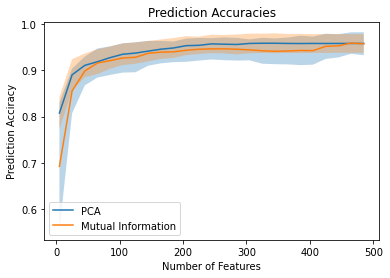

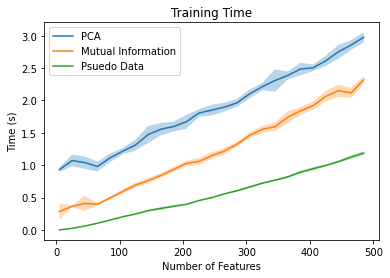

In [72]:
# Plot prediction accuracies
fig, ax = plt.subplots()
ax.plot(num_features, pca_acc_mean, label= 'PCA')
ax.plot(num_features, ml_acc_mean, label = 'Mutual Information')
# ax.plot(num_features, psd_acc_mean, label = 'Psuedo Data')
ax.fill_between(num_features, ml_acc_mean+ml_acc_stds, ml_acc_mean-ml_acc_stds, alpha=0.3)
ax.fill_between(num_features, pca_acc_mean+pca_acc_stds, pca_acc_mean-pca_acc_stds, alpha=0.3)
# ax.fill_between(num_features, psd_acc_mean+psd_acc_stds, psd_acc_mean-psd_acc_stds, alpha=0.3)
ax.set(title="Prediction Accuracies", xlabel="Number of Features", ylabel="Prediction Acciracy")
plt.legend()
plt.show()

# Plot timing
fig, ax = plt.subplots()
ax.plot(num_features, pca_time_mean, label= 'PCA')
ax.fill_between(num_features, pca_time_mean+pca_time_stds, pca_time_mean-pca_time_stds, alpha=0.3)
ax.plot(num_features, ml_time_mean, label = 'Mutual Information')
ax.fill_between(num_features, ml_time_mean+ml_time_stds, ml_time_mean-ml_time_stds, alpha=0.3)
ax.plot(num_features, psd_time_mean, label = 'Psuedo Data')
ax.fill_between(num_features, psd_time_mean+psd_time_stds, psd_time_mean-psd_time_stds, alpha=0.3)
ax.set(title="Training Time", xlabel="Number of Features", ylabel="Time (s)")
plt.legend()
plt.show()

### Part 3
- Identify the optimal number of features using feature engineering technique based on time and accuracy. 

In [81]:
err = 0.003
#For PCA
for i in range (0,len(num_features)):
    if pca_acc_mean[i+1] - pca_acc_mean[i] <= err:
        PCA_f = i
        print(f'For {num_features[i]}, the accuracy is {pca_acc_mean[i]}')
        break
        
# For MI
for j in range (0,len(num_features)):
    if ml_acc_mean[j+1] - ml_acc_mean[j] <= err:
        MI_f = j
        print(f'For {num_features[j]}, the accuracy is {ml_acc_mean[j]}')
        break

For 105, the accuracy is 0.934946550048591
For 105, the accuracy is 0.9268894298357347


### From our results above, PCA generates the best accuracy for the same number of features. However, based on the time plot, MI takes less time to run than PCA.  

In [85]:
pred_accuracy, fit_times = do_kfold_pca(svm.SVC(kernel='linear', C=1), combined_x, combined_y, features= num_features[PCA_f])
pred_accuracy
fit_times

10it [00:17,  1.74s/it]

105 FEATURES PREDICTION ACCURACY: 0.934 $\pm$ 0.022


[1.1279826164245605,
 1.0940730571746826,
 1.1459345817565918,
 1.3065049648284912,
 1.216745138168335,
 1.5069680213928223,
 1.2835659980773926,
 1.1728627681732178,
 1.1190056800842285,
 1.1449368000030518]